In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

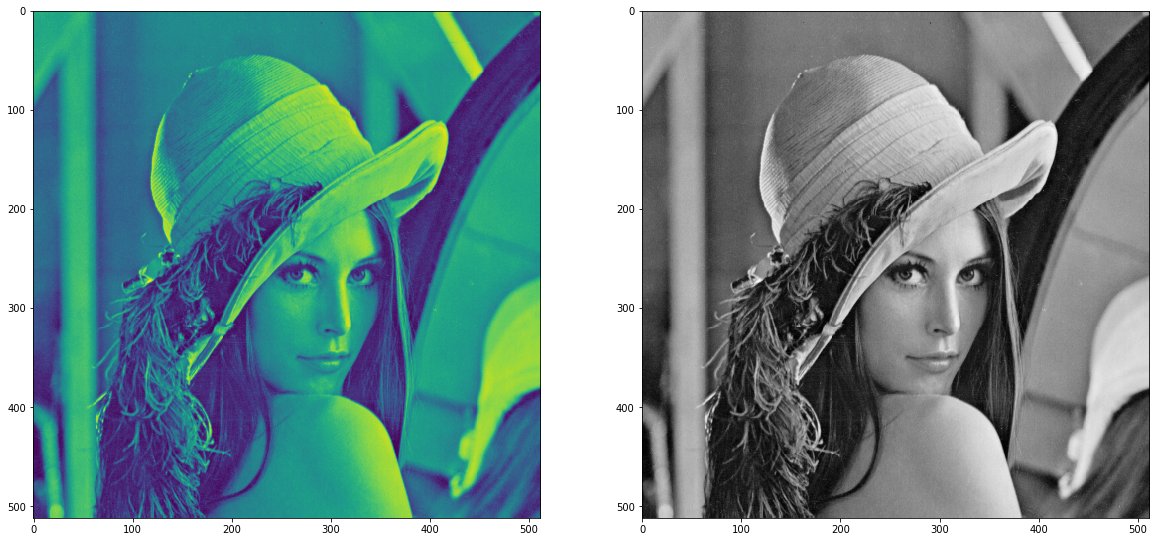

In [55]:
img = mpimg.imread('../img/lena_gray.png')
fig, ax = plt.subplots(1, 2, figsize=(20,20))
ax[0].imshow(img)
ax[1].imshow(img, cmap='gray')

Question 1
---------------
Download Lena image(grayscale), say f. Generate 100 noisy versions of f by adding Gaussian noise, and find the average of noisy images and display the same.

In [ ]:
# helper functions
def add_gaussian_noise(img, mean=0, std_dev=0.1):
    """ Adds gaussian noise to the given image 
    img : Image data with float values in range 0, 1
    mean : mean value of the noise being added
    std_dev : standard deviation of the noise being added
    """
    noise = np.random.normal(mean, std_dev, img.shape)
    noisy_img = np.clip(img + noise, 0, 1)
    return noisy_img

def add_salt_and_pepper_noise(img, amount):
    """ Adds salt and pepper noise to the given image
    img : Image data with float values in range 0, 1
    amount : percent of pixels to be affected
    """
    # for single channel image
    if len(img.shape) == 2:
        noisy_img = np.copy(img)
        # add pepper
        noise_location = np.random.random(noisy_img.shape) < (amount/2)
        noisy_img[noise_location] = 1.0
        # add salt
        noise_location = np.random.random(noisy_img.shape) < (amount/2)
        noisy_img[noise_location] = 0.0
        
        return noisy_img
    
def median_filter(img, size):
    """ Applies median filter over the img
    img : Image data with float values in range 0, 1
    size : size of the filter, if size is n, then n x n filter will be used
           size should be an odd integer
           
    Applies a pad of intensity 0 to input image based on filter size and then applies median filter,
    returns the cropped image as output.
    """
    
    if size%2 == 0:
        raise ValueError('Expected size to be an odd integer.')
    
    # create placeholder
    irows = img.shape[0]
    icols = img.shape[1]
    pad = size//2 # img pad size
    i = np.zeros((irows + (2*pad), icols + (2*pad)))  # padded placeholder
    
    # copy original image
    padrows = i.shape[0]
    padcols = i.shape[1]
    i[pad : padrows - pad, pad : padcols - pad] = img  # copy of original image with padding
    originx, originy = pad, pad 
    
    # output holder
    output = np.copy(i)

    #for ix, iy in np.ndindex(i.shape):
    for ix in range(irows):
        for iy in range(icols):
            shiftedx = originx + ix
            shiftedy = originy + iy
            output[shiftedx, shiftedy] = np.median(i[shiftedx + (-pad): shiftedx + pad + 1, 
                                                     shiftedy + (-pad): shiftedy + pad + 1])
            
    # crop the output of input image size
    output = output[pad : padrows - pad, pad : padcols - pad]
        
    return output

Text(0.5, 1.0, 'Lena average')

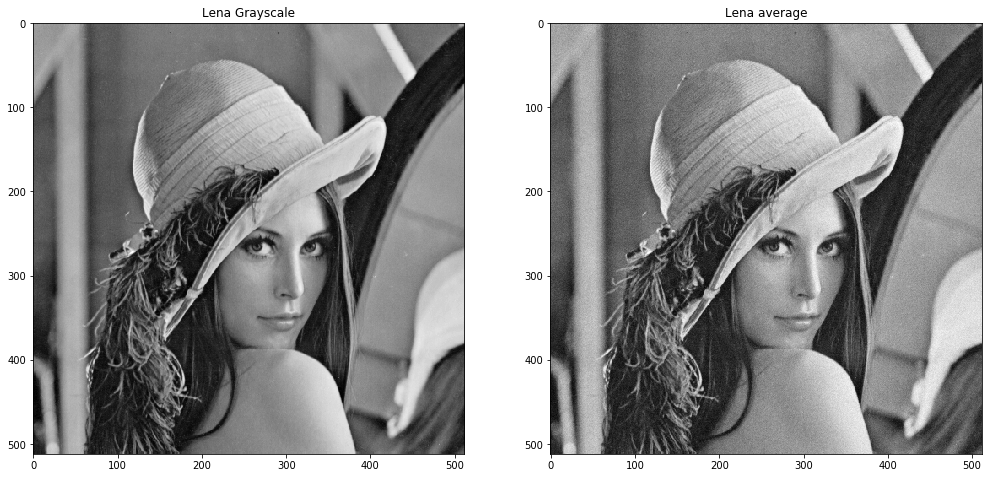

In [64]:
# original image
fig, ax = plt.subplots(1,2, figsize=(17,17))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Lena Grayscale')

noisy_images = list()
for i in range(100):
    nimg =  add_gaussian_noise(img, 0, 0.2)
    noisy_images.append(nimg)

avg = np.zeros(img.shape)
for nimg in noisy_images:
    avg += nimg
avg /= len(noisy_images)

ax[1].imshow(avg, cmap='gray')
ax[1].set_title('Lena average')

Question 2
---------------
Use the new Lena image (unprocessed), add salt and pepper noise to it. Use median filters of sizes 3x3, 5x5, 7x7 to remove that noise.

Text(0.5, 1.0, 'After median filter of size 7')

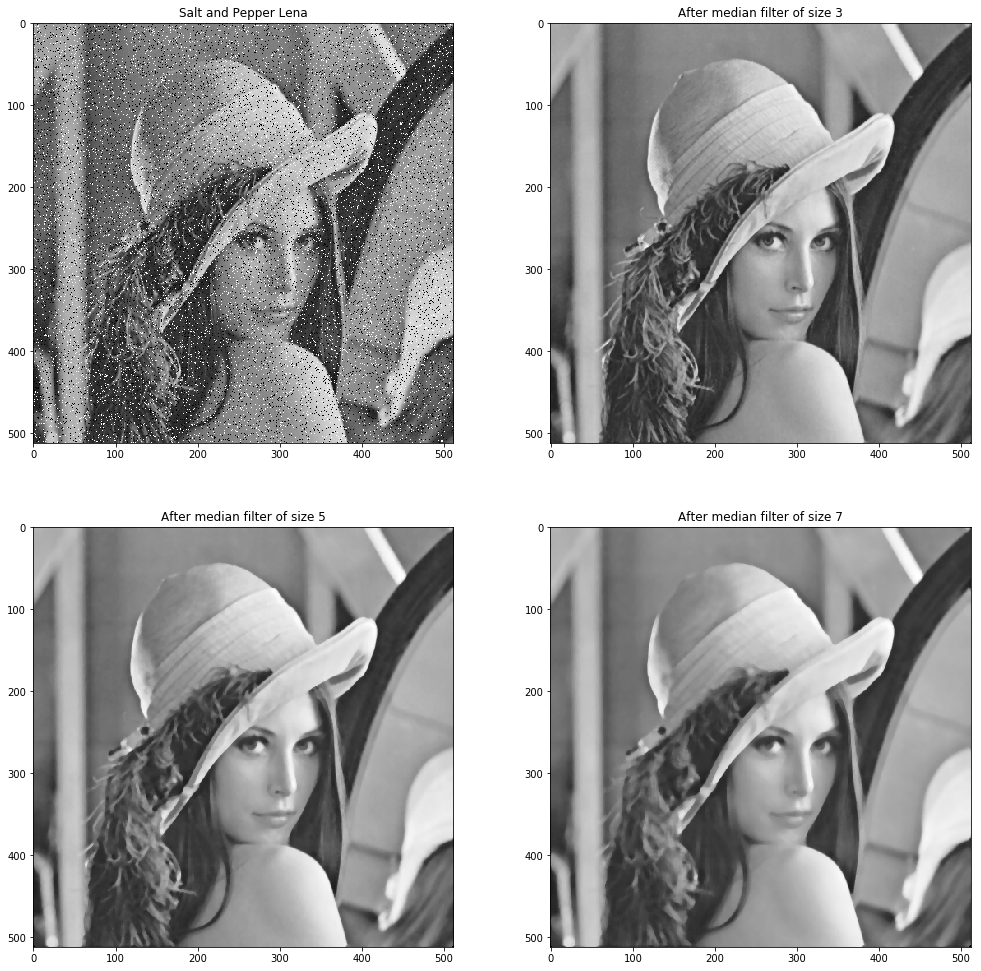

In [69]:
fig, ax = plt.subplots(2, 2, figsize=(17,17))
nimg = add_salt_and_pepper_noise(img, 0.1)
ax[0,0].imshow(nimg, cmap='gray')
ax[0,0].set_title('Salt and Pepper Lena')

# use median filter
fimg3 = median_filter(img, 3)
ax[0,1].imshow(fimg3, cmap='gray')
ax[0,1].set_title('After median filter of size 3')

fimg5 = median_filter(img, 5)
ax[1,0].imshow(fimg5, cmap='gray')
ax[1,0].set_title('After median filter of size 5')

fimg7 = median_filter(img, 7)
ax[1,1].imshow(fimg7, cmap='gray')
ax[1,1].set_title('After median filter of size 7')

Question 3
---------------
Download leaning tower of PISA image(grayscale), and find the angle of inclination (use bilinear interpolation while rotating).

Question 4
---------------
Download cameraman image and do the following( in each, use nearest neighbor interpolation and bi-linear interpolation, and compare the results):
1. Scale it by 0.5 and display.
2. Scale it by 2 and display.
3. convert to the image of size 200x200 and display.

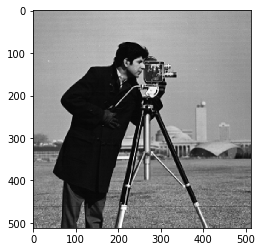

In [78]:
i = mpimg.imread('../img/cameraman.tif')
plt.imshow(i, cmap='gray')

Question 5
---------------
Find attached pout-dark, pout- bright images,
1. Do histogram equalization on pout-dark and display the same
2. Do histogram matching(specification) on the pout-dark image, keeping pout-bright as a reference image.

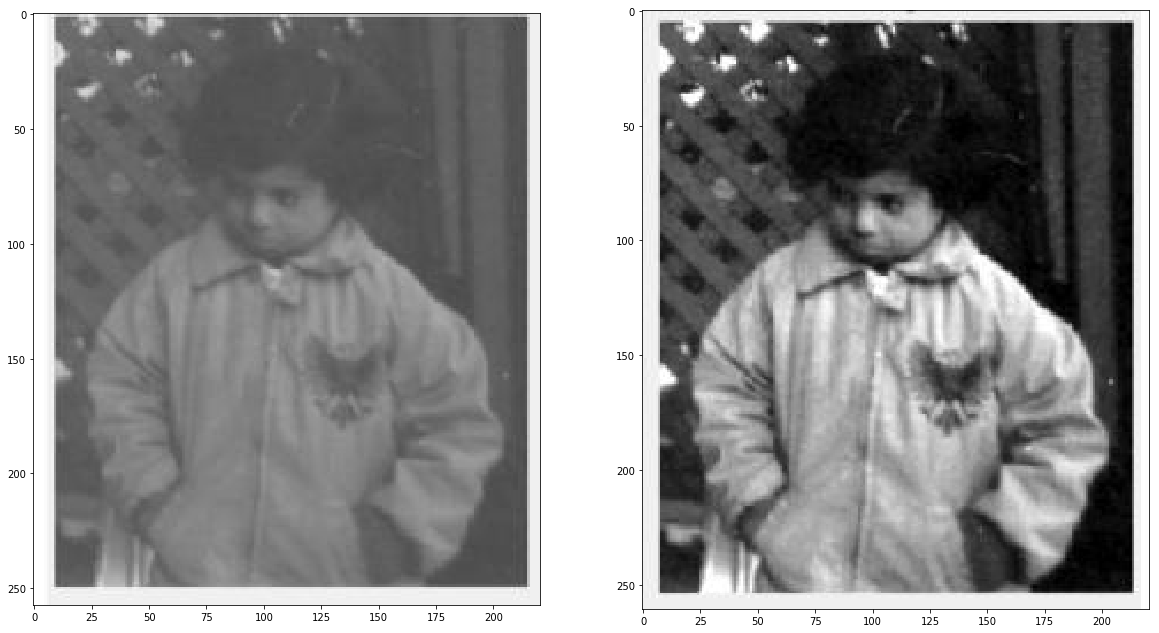

In [80]:
poutd = mpimg.imread('../img/pout-dark.jpg')
poutb = mpimg.imread('../img/pout-bright.jpg')

fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(poutd)
ax[1].imshow(poutb)